In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from itertools import combinations

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Data Visualization 

<Axes: xlabel='type', ylabel='count'>

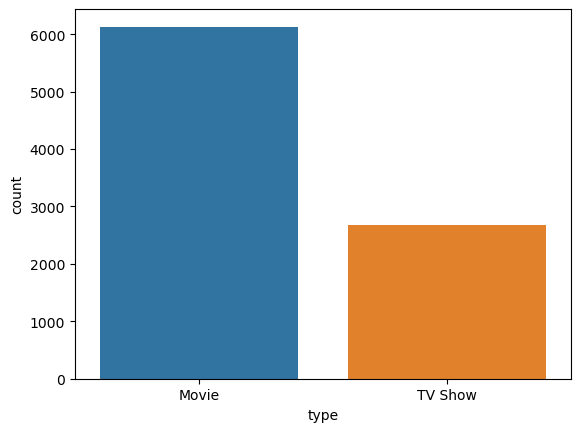

In [6]:
sns.countplot(data=df,x='type')

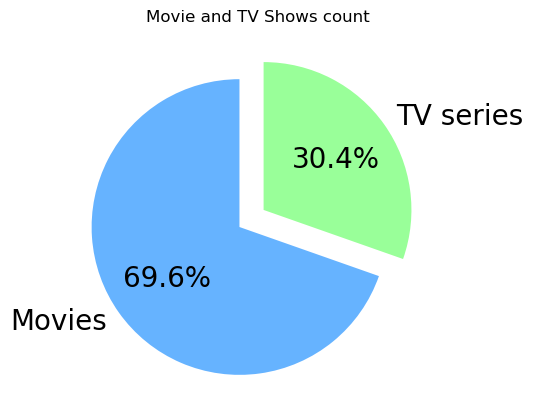

<Figure size 640x480 with 0 Axes>

In [7]:
def pie_chart(df, column ,explode , labels,title,no):
    
    plt.pie(df[column].value_counts(),
            explode=explode,    #explode=[0.04,0]
            startangle=90, 
            autopct='%1.1f%%',
            labels=labels, #labels=['Males','Females']
            colors = ['#66b3ff','#99ff99'],
            pctdistance=.6,
            textprops={'fontsize': 20})
    plt.title(title)
    plt.figure(no)

pie_chart(df, "type" ,[0.15,0.05], ['Movies',"TV series"],"Movie and TV Shows count",0)

### Top ten directors of netflix users 

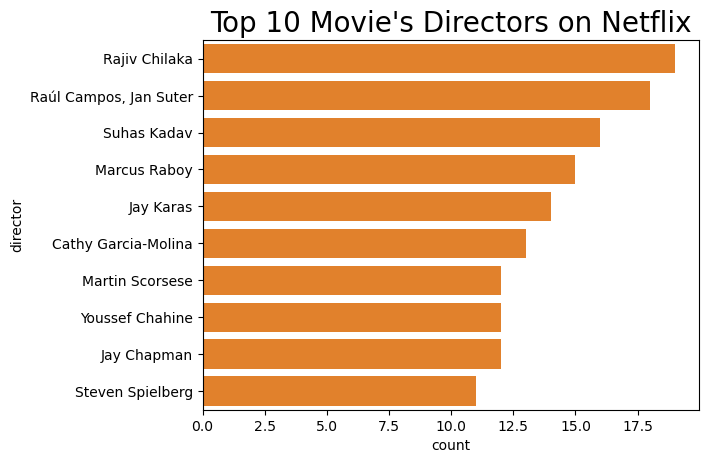

In [8]:
Top10_movies_directors = df[df['type'] == 'Movie']

base_color = sns.color_palette()[1]

sns.countplot(y = 'director',color= base_color, data = Top10_movies_directors, order = Top10_movies_directors.director.value_counts().head(10).index)

plt.title("Top 10 Movie's Directors on Netflix", fontsize = 20);

### Top ten series director

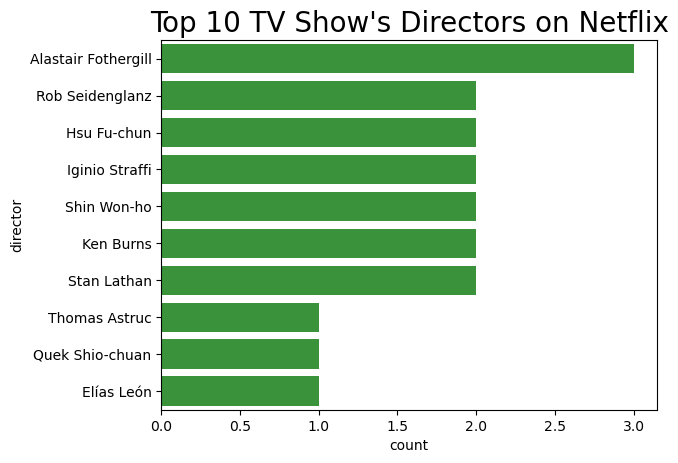

In [9]:
Top10_Series_directors = df[df['type'] == 'TV Show']

base_color = sns.color_palette()[2]

sns.countplot(y = 'director',color= base_color, data = Top10_Series_directors, order = Top10_Series_directors.director.value_counts().head(10).index)

plt.title("Top 10 TV Show's Directors on Netflix", fontsize = 20);

### Top ten countries with films on Netlfix 

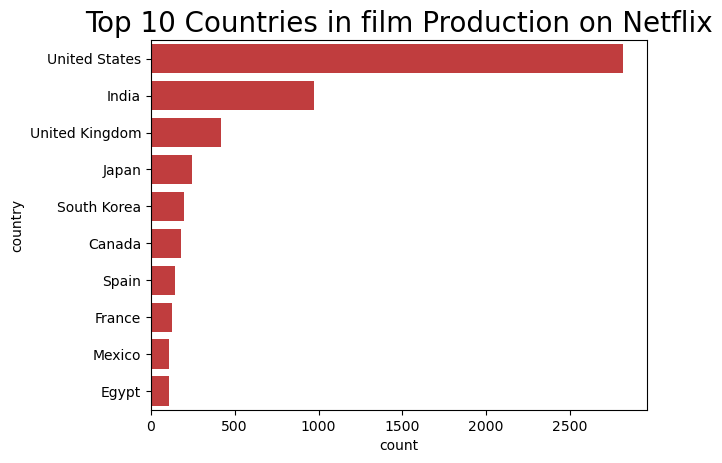

In [10]:
base_color = sns.color_palette()[3]

sns.countplot(y = 'country',color= base_color, data = df, order = df.country.value_counts().head(10).index)

plt.title("Top 10 Countries in film Production on Netflix", fontsize = 20);

For rating, date_added and country i'm not going to use them so i will just keep them like that

As cast and country are important features when calculating the similarity between movies, i won't be able to fill them with a good information so, i will drop NaNs of them

For director, if i dropped NaNs it will be a big loss of data so, i will fill it with Unknown

In [11]:
df= df.dropna(subset=['cast','country'], axis = 0)
df['director'] = df['director'].fillna("Unknown")
df = df.reset_index( drop=True)

In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      9
release_year    0
rating          3
duration        3
listed_in       0
description     0
dtype: int64

### Here will combine all the info like type,cast,country ,description,title,director and then apply cosine similarity on top of it 

In [13]:
overall_infos=[]

for i in range(0,df.shape[0]):
    overall_infos.append(df['type'][i]+' '+df['title'][i]+' '+df['director'][i]+' '+df['cast'][i]+' '+df['description'][i]+' '+df['country'][i])
df['overall_infos']=overall_infos

In [14]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
0,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show Blood & Water Unknown Ama Qamata, Khos..."


In [15]:
df['show_id'].nunique()

7305

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        7305 non-null   object
 1   type           7305 non-null   object
 2   title          7305 non-null   object
 3   director       7305 non-null   object
 4   cast           7305 non-null   object
 5   country        7305 non-null   object
 6   date_added     7296 non-null   object
 7   release_year   7305 non-null   int64 
 8   rating         7302 non-null   object
 9   duration       7302 non-null   object
 10  listed_in      7305 non-null   object
 11  description    7305 non-null   object
 12  overall_infos  7305 non-null   object
dtypes: int64(1), object(12)
memory usage: 742.0+ KB


### show_id is not consistent so we will create own id for consistency 

In [17]:
df.insert(1, "id", list(range(1, 7306)), True)

In [18]:
df.head(2)

,show_id,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
0,s2,1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show Blood & Water Unknown Ama Qamata, Khos..."
1,s5,2,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"TV Show Kota Factory Unknown Mayur More, Jiten..."


In [19]:
df_final=df[['id','overall_infos']]

In [20]:
df_final.head()

,id,overall_infos
0,1,"TV Show Blood & Water Unknown Ama Qamata, Khos..."
1,2,"TV Show Kota Factory Unknown Mayur More, Jiten..."
2,3,"Movie Sankofa Haile Gerima Kofi Ghanaba, Oyafu..."
3,4,TV Show The Great British Baking Show Andy Dev...
4,5,Movie The Starling Theodore Melfi Melissa McCa...


### Text Processing 

In [21]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

In [22]:
#Stopwords help us to get rid of unwanted words like: a, an, are, is, ...
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [23]:
def text_preprocessing(column):
    #make all words with lower letters
    column = column.str.lower()
    #getting rid of any punctution
    column = column.str.replace('http\S+|www.\S+|@|%|:|,|', '', case=False)
    #spliting each sentence to words to apply previous funtions on them 
    word_tokens = column.str.split()
    keywords = word_tokens.apply(lambda x: [item for item in x if item not in stop])
    #assemble words of each sentence again and assign them in new column
    for i in range(len(keywords)):
        keywords[i] = " ".join(keywords[i])
        column = keywords

    return column

In [24]:
df_final['cleaned_infos'] = text_preprocessing(df_final['overall_infos'])

C:\Users\abhisuma.ORADEV\AppData\Local\Temp\ipykernel_13328\3812408918.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('http\S+|www.\S+|@|%|:|,|', '', case=False)
C:\Users\abhisuma.ORADEV\AppData\Local\Temp\ipykernel_13328\1100285566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cleaned_infos'] = text_preprocessing(df_final['overall_infos'])


In [25]:
df_final.head(1)

,id,overall_infos,cleaned_infos
0,1,"TV Show Blood & Water Unknown Ama Qamata, Khos...",tv show blood & water unknown ama qamata khosi...


In [26]:
df_final['overall_infos'][6]

'TV Show Dear White People Unknown Logan Browning, Brandon P. Bell, DeRon Horton, Antoinette Robertson, John Patrick Amedori, Ashley Blaine Featherson, Marque Richardson, Giancarlo Esposito Students of color navigate the daily slights and slippery politics of life at an Ivy League college that\'s not nearly as "post-racial" as it thinks. United States'

In [27]:
df_final['cleaned_infos'][6]

'tv show dear white people unknown logan browning brandon p. bell deron horton antoinette robertson john patrick amedori ashley blaine featherson marque richardson giancarlo esposito students color navigate daily slights slippery politics life ivy league college that\'s nearly "post-racial" thinks. united states'

In [28]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### 1. Applying count vectorizer 

In [29]:
###Applying count vectorizer
CV = CountVectorizer()
converted_metrix = CV.fit_transform(df_final['cleaned_infos'])

In [30]:
cosine_similarity = cosine_similarity(converted_metrix)

In [31]:
cosine_similarity

array([[1.        , 0.05856516, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05856516, 1.        , 0.        , ..., 0.02678358, 0.04938648,
        0.07919455],
       [0.        , 0.        , 1.        , ..., 0.10006256, 0.09225312,
        0.04931137],
       ...,
       [0.        , 0.02678358, 0.10006256, ..., 1.        , 0.10846523,
        0.02898855],
       [0.        , 0.04938648, 0.09225312, ..., 0.10846523, 1.        ,
        0.02672612],
       [0.        , 0.07919455, 0.04931137, ..., 0.02898855, 0.02672612,
        1.        ]])

### Testing 

In [32]:
#finding the correct name of a movie
df[df['title'].str.contains('Ninja')]

,show_id,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
39,s64,40,Movie,Naruto the Movie: Ninja Clash in the Land of Snow,Tensai Okamura,"Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...",Japan,"September 15, 2021",2004,TV-PG,83 min,"Action & Adventure, Anime Features, Internatio...","Naruto, Sasuke and Sakura learn they'll be pro...",Movie Naruto the Movie: Ninja Clash in the Lan...
512,s803,513,Movie,Ninja Assassin,James McTeigue,"Rain, Naomie Harris, Ben Miles, Rick Yune, Shô...","Germany, United States, France","June 2, 2021",2009,R,99 min,Action & Adventure,A former assassin must protect himself and a E...,"Movie Ninja Assassin James McTeigue Rain, Naom..."
926,s1351,927,TV Show,Power Rangers Ninja Steel,Unknown,"William Shewfelt, Nico Greetham, Zoe Robins, P...",United States,"February 3, 2021",2018,TV-Y7,2 Seasons,Kids' TV,A new generation of teen heroes uses superhuma...,TV Show Power Rangers Ninja Steel Unknown Will...
929,s1354,930,Movie,Beverly Hills Ninja,Dennis Dugan,"Chris Farley, Nicollette Sheridan, Robin Shou,...",United States,"February 1, 2021",1997,PG-13,89 min,"Action & Adventure, Comedies","Raised by ninjas, a big-hearted but bumbling o...",Movie Beverly Hills Ninja Dennis Dugan Chris F...
965,s1396,966,TV Show,Hello Ninja,Unknown,"Lukas Engel, Zoey Siewert, Sam Vincent, Mayumi...",United States,"January 19, 2021",2021,TV-Y,4 Seasons,Kids' TV,BFFs Wesley and Georgie and their silly cat si...,"TV Show Hello Ninja Unknown Lukas Engel, Zoey ..."
1276,s1759,1277,TV Show,LEGO Ninjago,Unknown,"Michael Adamthwaite, Paul Dobson, Kelly Metzge...",Canada,"November 1, 2020",2020,TV-Y7,2 Seasons,Kids' TV,While fighting foes across Ninjago City and be...,TV Show LEGO Ninjago Unknown Michael Adamthwai...
1277,s1760,1278,TV Show,LEGO Ninjago: Masters of Spinjitzu,Unknown,"Vincent Tong, Jillian Michaels, Ian James Corl...","Denmark, Singapore, Canada, United States","November 1, 2020",2019,TV-Y7,10 Seasons,Kids' TV,"Kai, Jay, Cole and Zane must master their elem...",TV Show LEGO Ninjago: Masters of Spinjitzu Unk...
5553,s6766,5554,Movie,Five Elements Ninjas,Cheh Chang,"Tien-chi Cheng, Tien Hsiang Lung, Meng Lo, Mic...",Hong Kong,"September 17, 2019",1982,R,104 min,"Action & Adventure, International Movies",When five ninjas whose fighting styles are bas...,Movie Five Elements Ninjas Cheh Chang Tien-chi...
6253,s7589,6254,TV Show,Ninja Hattori,Unknown,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...,"TV Show Ninja Hattori Unknown Junko Hori, Masa..."
6254,s7590,6255,TV Show,Ninja Turtles: The Next Mutation,Unknown,"Jarred Blancard, Mitchell A. Lee Yuen, Dean Ch...","Canada, United States","January 1, 2016",1997,TV-G,1 Season,"Kids' TV, TV Comedies",Everyone's favorite teenage mutants are back i...,TV Show Ninja Turtles: The Next Mutation Unkno...


In [33]:
#this how we will get the id of the movie so we can check similarity between it and other movies
title = 'Teenage Mutant Ninja Turtles'

movie_id = df[df['title'] == title]['id'].values[0]

In [34]:
score = list(enumerate(cosine_similarity[movie_id]))

In [35]:
#now sort the similar movies in descending order
sorted_score = sorted(score, key=lambda x:x[1], reverse= True)
#we will ignore the first score because it will give us a 100% score because it's the same movie 
sorted_score = sorted_score[1:]

In [36]:
sorted_score[0:10]

[(6757, 0.33333333333333337),
 (3136, 0.1986798535597566),
 (6254, 0.1986798535597566),
 (4483, 0.19529164171612678),
 (3947, 0.18848425873126295),
 (5912, 0.18848425873126295),
 (4840, 0.1861714808514273),
 (5914, 0.1861714808514273),
 (1217, 0.18394180184548975),
 (2324, 0.18179036173052482)]

In [37]:
#now showing the top 5 movies similar to TMNT accroding to this algorithm
i = 0
for item in sorted_score:
    movie_title = df[df['id'] == item[0]]['title'].values[0]
    print(i+1,movie_title)
    i = i+1
    if i > 4:
        break

1 Teenage Cocktail
2 Jagat
3 Ninja Hattori
4 Macho
5 Psychokinesis


### 2 TF IDF Vectorizer 

In [38]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

### Tfidftransformer

In [39]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_final['cleaned_infos'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7305, 49257)

In [40]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names_out(), columns=["tf-idf score"])

,tf-idf score
007,0.0
009,0.0
01,0.0
10,0.0
100,0.0
...,...
يوم,0.0
ṣọpẹ,0.0
마녀사냥,0.0
반드시,0.0


In [41]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df_final['cleaned_infos'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df_final['cleaned_infos']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [8.28701329 8.79783892 9.20330403 ... 9.20330403 9.20330403 9.20330403]


In [42]:
pipe['tfid'].idf_.shape

(49257,)

In [43]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names_out(), columns=['idf_weights'])

,idf_weights
007,8.287013
009,8.797839
01,9.203304
10,6.258865
100,7.188401
...,...
يوم,9.203304
ṣọpẹ,9.203304
마녀사냥,9.203304
반드시,9.203304


In [44]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim1 = linear_kernel(tfidf_matrix, tfidf_matrix)

In [45]:
cosine_sim1

array([[1.        , 0.00417555, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00417555, 1.        , 0.        , ..., 0.01532764, 0.02958038,
        0.02306962],
       [0.        , 0.        , 1.        , ..., 0.00556368, 0.00521261,
        0.01180479],
       ...,
       [0.        , 0.01532764, 0.00556368, ..., 1.        , 0.04335326,
        0.00110912],
       [0.        , 0.02958038, 0.00521261, ..., 0.04335326, 1.        ,
        0.00103914],
       [0.        , 0.02306962, 0.01180479, ..., 0.00110912, 0.00103914,
        1.        ]])

### Recommendation engine by description

In [46]:
programme_list=df['title'].to_list()

In [47]:
def recommend(title, cosine_similarity=cosine_sim1):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim1[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11]#position 0 is the movie itself, thus exclude
    print("Similarity score:",sim_score)
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [48]:
recommend('Avengers: Infinity War')

Similarity score: [(7116, 0.15492716976630666), (7213, 0.10787043371344766), (5181, 0.09613951666668484), (6958, 0.09407457462350426), (5725, 0.0927527424454036), (1150, 0.09246842075848856), (5308, 0.08688172078391437), (975, 0.08525835240567085), (800, 0.08374426058974543), (623, 0.08363018088457448)]


,Recommend programme,Similarity(0-1)
0,Thor: Ragnarok,0.1549
1,War Horse,0.1079
2,Black Panther,0.0961
3,The Little Prince,0.0941
4,Her,0.0928
5,Chef,0.0925
6,Chris Brown: Welcome to My Life,0.0869
7,Penguins of Madagascar: The Movie,0.0853
8,Get on Up,0.0837
9,August: Osage County,0.0836


In [51]:
recommend('Thor: Ragnarok')

Similarity score: [(1414, 0.16759202848132115), (5069, 0.15492716976630666), (7117, 0.146811042317115), (84, 0.14056482899612877), (4017, 0.0972857828483957), (968, 0.0890800925558627), (3440, 0.08632780169972065), (5308, 0.077036623389565), (7213, 0.07582739473906852), (7178, 0.07226552481650433)]


,Recommend programme,Similarity(0-1)
0,Hunt for the Wilderpeople,0.1676
1,Avengers: Infinity War,0.1549
2,Thor: Tales of Asgard,0.1468
3,Green Lantern,0.1406
4,The Outsider,0.0973
5,Death of Me,0.0891
6,Mowgli: Legend of the Jungle,0.0863
7,Chris Brown: Welcome to My Life,0.0770
8,War Horse,0.0758
9,Under an Arctic Sky,0.0723
